In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.constants import hbar, physical_constants
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from quantum_classes import *
from pauli_matrices import *

In [10]:
natural_freq = 10 * 10**9
driving_freq = 10 * 10**9
rabi_freq = 5 * 10**6
hamiltonian = Quantum_Hamiltonian(rabi_freq, 1, np.array([natural_freq]))
system = Quantum_System(hamiltonian, 1)



# Points at which to evaluate the solution
initial_state = np.array([1 + 0j, 0 + 0j])

# CCD parameters
phi_0, epsilon_m, phase_freq, theta_m = 0, rabi_freq/4, rabi_freq, 0, 

driving_omega = 2 * np.pi * driving_freq
t, y = system.evolve_state(initial_state, 10**-6, 100, ham_type='ccd_rwa', driving_freq=driving_freq, phi_0=phi_0, epsilon_m=epsilon_m, phase_freq=phase_freq, theta_m=theta_m)

# Convert time to microseconds
t_micro = t * 10**6
# Calculate the z expectation value and take the real part
z_expectation = np.real(calculate_z_expectation(y))


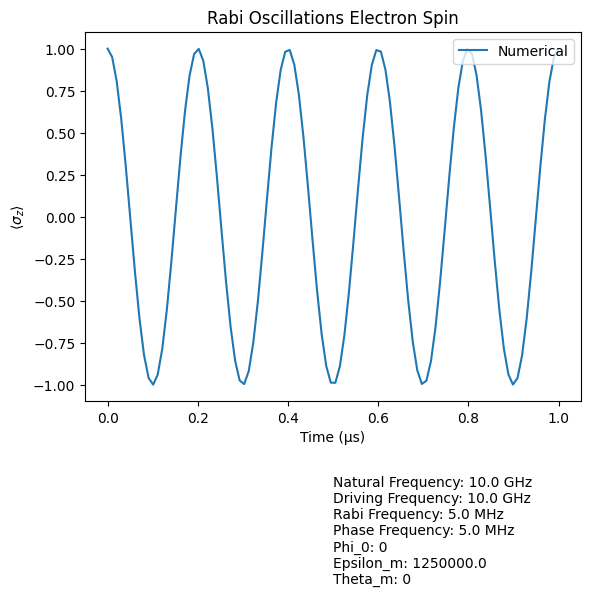

In [11]:
plt.plot(t_micro, z_expectation, label='Numerical')
plt.xlabel('Time (µs)')
plt.ylabel(r'$\langle\sigma_z\rangle$')
plt.title('Rabi Oscillations Electron Spin')
plt.legend(loc='upper right')

# Add metadata/caption with relevant frequencies
metadata = (f"Natural Frequency: {natural_freq / 1e9} GHz\n"
            f"Driving Frequency: {driving_freq / 1e9} GHz\n"
            f"Rabi Frequency: {rabi_freq / 1e6} MHz\n"
            f"Phase Frequency: {phase_freq / 1e6} MHz\n"
            f"Phi_0: {phi_0}\n"
            f"Epsilon_m: {epsilon_m}\n"
            f"Theta_m: {theta_m}")

# Positioning the metadata in the top-left corner
plt.text(0.5, -0.2, metadata, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', ha='left', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Show the plot
plt.show()


In [14]:

# Define a range of driving frequencies
driving_freqs = np.linspace(9.99e9, 10.01e9, 50)  # from 9 GHz to 11 GHz

# Initialize a list to store the z expectation values for each driving frequency
z_expectations = []

# Loop through each driving frequency
for freq in driving_freqs:
    t, y = system.evolve_state(initial_state, 10**-6, 100, ham_type='ccd_rwa', driving_freq=freq, phi_0=phi_0, epsilon_m=epsilon_m, phase_freq=phase_freq, theta_m=theta_m)
    z_expectation = np.real(calculate_z_expectation(y))
    z_expectations.append(z_expectation)


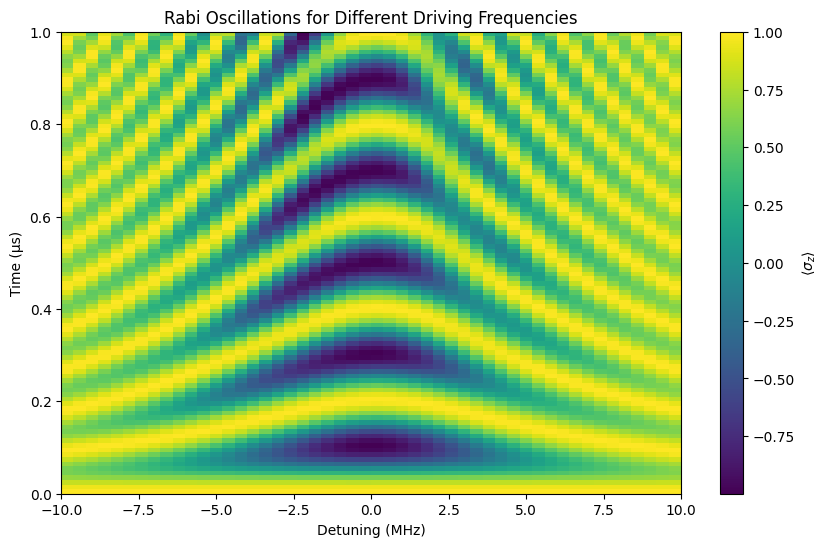

In [15]:
# Convert the list to a numpy array for easier plotting
z_expectations = np.array(z_expectations).T

# Calculate the detuning
detuning = (driving_freqs - natural_freq) / 1e6  # Convert to MHz

# Create the color plot
plt.figure(figsize=(10, 6))
plt.imshow(z_expectations, aspect='auto', extent=[detuning[0], detuning[-1], t_micro[0], t_micro[-1]], origin='lower', cmap='viridis')
plt.colorbar(label=r'$\langle\sigma_z\rangle$')
plt.xlabel('Detuning (MHz)')
plt.ylabel('Time (µs)')
plt.title('Rabi Oscillations for Different Driving Frequencies')
plt.show()


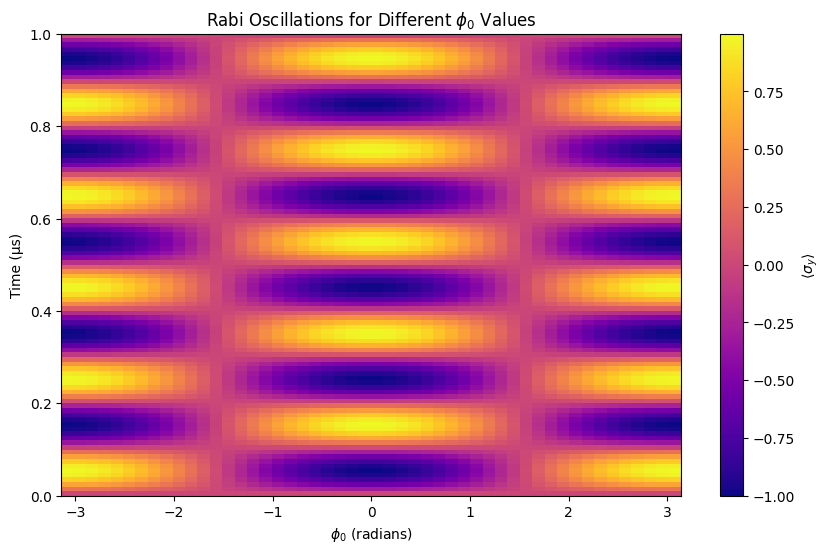

In [7]:
phi_0, epsilon_m, phase_freq, theta_m = np.pi/2, 0, 2*10**6, 0, 
natural_freq = 18 * 10**9
driving_freq = 18 * 10**9
rabi_freq = 5 * 10**6
# Define a range of phi_0 values
phi_0_values = np.linspace(-np.pi, np.pi, 50)  # from 0 to pi

# Initialize a list to store the y expectation values for each phi_0 value
y_expectations_phi_0 = []

# Loop through each phi_0 value
for phi in phi_0_values:
    t, y = system.evolve_state(initial_state, 10**-6, 100, ham_type='ccd_rwa', driving_freq=driving_freq, phi_0=phi, epsilon_m=epsilon_m, phase_freq=phase_freq, theta_m=theta_m)
    y_expectation = np.real(calculate_expectations(y, sigma_y))
    y_expectations_phi_0.append(y_expectation)

# Convert the list to a numpy array for easier plotting
y_expectations_phi_0 = np.array(y_expectations_phi_0).T

# Create the color plot
plt.figure(figsize=(10, 6))
plt.imshow(y_expectations_phi_0, aspect='auto', extent=[phi_0_values[0], phi_0_values[-1], t_micro[0], t_micro[-1]], origin='lower', cmap='plasma')
plt.colorbar(label=r'$\langle\sigma_y\rangle$')
plt.xlabel(r'$\phi_0$ (radians)')
plt.ylabel('Time (µs)')
plt.title(r'Rabi Oscillations for Different $\phi_0$ Values')
plt.show()